In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [43]:
Ruta = r"c:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rinc칩n Z\informes\2025\CTO135.2025 Informe  #7\ACTIVIDAD 14\Presatciones economicas\PRESTACIONES ECONOMICAS 2024 - 2025.xlsx"
Hoja="CONSOLIDADO 24-25 PE"

In [44]:
df = pd.read_excel(Ruta, sheet_name=Hoja, dtype=str)
df.head()

Source.Name C칩digo de la EPS    Fecha del Proceso  \
0  PRE4023EPSC2519042024.txt           EPSC25  2024-04-19 00:00:00   
1  PRE4023EPSC2519042024.txt           EPSC25  2024-04-19 00:00:00   
2  PRE4023EPSC2519042024.txt           EPSC25  2024-04-19 00:00:00   
3  PRE4023EPSC2519042024.txt           EPSC25  2024-04-19 00:00:00   
4  PRE4023EPSC2519042024.txt           EPSC25  2024-04-19 00:00:00   

  Tipo de Prestaci칩n Econ칩mica Tipo de Documento del cotizante  \
0                            1                              CC   
1                            3                              CC   
2                            1                              CC   
3                            3                              CC   
4                            3                              CC   

  N칰mero documento del cotizante Serial BDUA Tipo de Cotizante  \
0                     1116041167    85215103                 1   
1                     1118123953    77926338                 3   
2                     1006558728    71594502                 3   
3                     1118569787    67567049                 3   
4                     1007436205    98300480                 1   

  Tipo de Documento del aportante N칰mero documento del aportante  ...  \
0                              NI                      900194809  ...   
1                              CC                     1118123953  ...   
2                              CC                     1006558728  ...   
3                              CC                     1118569787  ...   
4                              NI                      901145978  ...   

  N칰mero de Documento de la madre cotizante fallecida  \
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN    

  N칰mero autorizaci칩n licencia para el caso de la madre cotizante fallecida  \
0                                                NaN                          
1                                                NaN                          
2                                                NaN                          
3                                                NaN                          
4                                                NaN                          

  D칤as faltantes de licencia madre fallecida Aprobaci칩n de la Licencia.  \
0                                          0                          1   
1                                          0                          1   
2                                          0                          1   
3                                          0                          1   
4                                          0                          1   

  C칩digo de glosas para registros con inconsistencia   A칌O MES NUM    MES  \
0                                                NaN  2024       4  Abril   
1                                                NaN  2024       4  Abril   
2                                                NaN  2024       4  Abril   
3                                                NaN  2024       7  Julio   
4                                                NaN  2024       7  Julio   

                      TIPO INCAPACIDAD    ESTADO  
0  licencia de Maternidad - Incapcidad  VALIDADO  
1  licencia de Maternidad - Incapcidad  VALIDADO  
2  licencia de Maternidad - Incapcidad  VALIDADO  
3              Inicial (Hasta 90 d칤as)  VALIDADO  
4              Inicial (Hasta 90 d칤as)  VALIDADO  

[5 rows x 36 columns]

In [45]:
df.columns

Index(['Source.Name', 'C칩digo de la EPS', 'Fecha del Proceso',
       'Tipo de Prestaci칩n Econ칩mica', 'Tipo de Documento del cotizante',
       'N칰mero documento del cotizante', 'Serial BDUA', 'Tipo de Cotizante',
       'Tipo de Documento del aportante', 'N칰mero documento del aportante',
       'Ingreso base de cotizaci칩n', 'Tipo de Salario',
       'Fecha Inicio Licencia o Incapacidad',
       'Fecha Terminaci칩n de la Licencia o incapacidad',
       'D칤as pagados de licencia o incapacidad',
       'Fecha de pago de licencia o incapacidad al aportante',
       'Licencia o incapacidad deducida o pagada',
       'Valor de licencia o incapacidad deducida o pagada',
       'N칰mero autorizaci칩n de licencia o incapacidad', 'Tipo de Incapacidad',
       'Tipo de licencia', 'D칤as de Gestaci칩n',
       'D칤as para nacimientos de ni침os prematuros', 'Fecha Gestacional',
       'Fecha de nacimiento a t칠rmino',
       'Tipo de Documento de la madre cotizante fallecida',
       'N칰mero de Documento 

# An치lisis corregido de la evoluci칩n de glosas y validaciones (febrero 2024 a mayo 2025)

Se analiza la evoluci칩n de los estados "GLOSADA" y "VALIDADO" en el consolidado de incapacidades y licencias, usando las columnas "MES", "ESTADO", "Serial BDUA" y "N칰mero documento del aportante".

**Interpretaci칩n sugerida:**  
- El primer gr치fico muestra la cantidad de registros 칰nicos glosados y validados por mes.
- El segundo gr치fico permite ver si la proporci칩n de glosas ha disminuido, aumentado o se ha mantenido estable en el periodo analizado.
- Puedes complementar el an치lisis revisando meses con picos o ca칤das y cruzando con eventos o cambios en procesos internos.

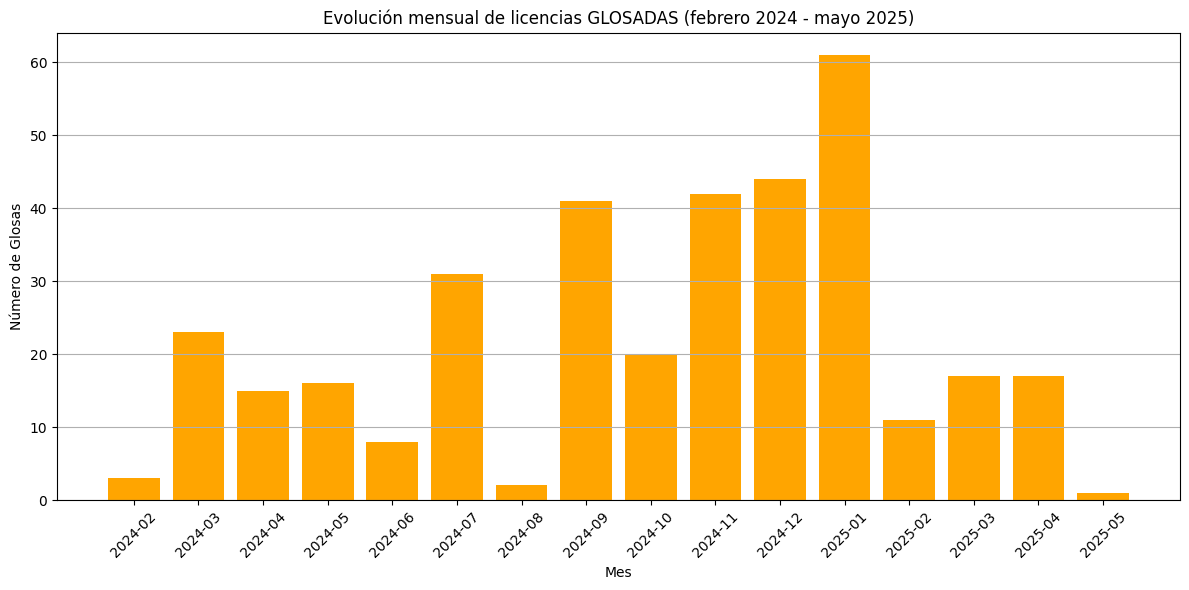

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'Fecha del Proceso' est칠 en formato datetime
df['Fecha del Proceso'] = pd.to_datetime(df['Fecha del Proceso'], errors='coerce')

# Filtrar por el periodo febrero 2024 a mayo 2025
inicio = '2024-02-01'
fin = '2025-05-31'
df_periodo = df[(df['Fecha del Proceso'] >= inicio) & (df['Fecha del Proceso'] <= fin)]

# Filtrar los registros con estado "GLOSADA"
df_glosadas = df_periodo[df_periodo['ESTADO'] == 'GLOSADA']

# Agrupar por a침o y mes para contar la cantidad de glosas
glosas_mensuales = df_glosadas.groupby(['A칌O', 'MES NUM']).size().reset_index(name='Total Glosas')

# Ordenar por a침o y mes para asegurar la secuencia cronol칩gica
glosas_mensuales = glosas_mensuales.sort_values(by=['A칌O', 'MES NUM'])

# Crear una columna de fecha combinada para graficar
glosas_mensuales['Fecha'] = pd.to_datetime(glosas_mensuales['A칌O'].astype(str) + '-' + glosas_mensuales['MES NUM'].astype(str).str.zfill(2) + '-01')

# Asegurarnos de que los datos est칠n ordenados por fecha
glosas_mensuales = glosas_mensuales.sort_values('Fecha')

# Volver a graficar con las fechas ordenadas
plt.figure(figsize=(12, 6))
plt.bar(glosas_mensuales['Fecha'].dt.strftime('%Y-%m'), glosas_mensuales['Total Glosas'], color='orange')
plt.title('Evoluci칩n mensual de licencias GLOSADAS (febrero 2024 - mayo 2025)')
plt.xlabel('Mes')
plt.ylabel('N칰mero de Glosas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<Figure size 1400x600 with 0 Axes>

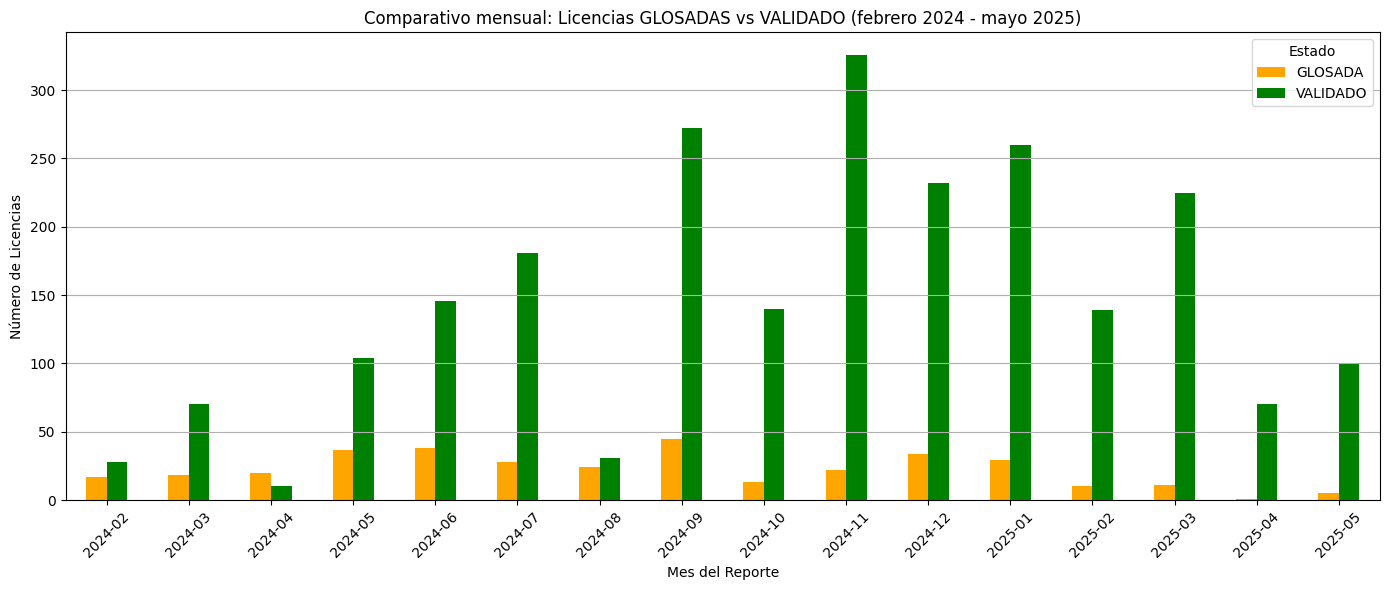

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar por el periodo de inter칠s
inicio = '2024-02-01'
fin = '2025-05-31'
df['Fecha del Proceso'] = pd.to_datetime(df['Fecha del Proceso'], errors='coerce')
df_periodo = df[(df['Fecha del Proceso'] >= inicio) & (df['Fecha del Proceso'] <= fin)]

# Crear columna de fecha mensual (inicio del mes)
df_periodo['MesReporte'] = df_periodo['Fecha del Proceso'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mes y estado (GLOSADA o VALIDADO)
conteo_estados = df_periodo.groupby(['MesReporte', 'ESTADO']).size().unstack(fill_value=0)

# Ordenar por fecha
conteo_estados = conteo_estados.sort_index()

# Replot con fechas m치s limpias (solo a침o y mes)
plt.figure(figsize=(14, 6))
conteo_estados.index = conteo_estados.index.to_series().dt.strftime('%Y-%m')  # <- clave
conteo_estados.plot(kind='bar', stacked=False, color=['orange', 'green'], figsize=(14, 6))

plt.title('Comparativo mensual: Licencias GLOSADAS vs VALIDADO (febrero 2024 - mayo 2025)')
plt.xlabel('Mes del Reporte')
plt.ylabel('N칰mero de Licencias')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Estado')
plt.show()


# 游댍 1. Tasa de glosas mensual (%)

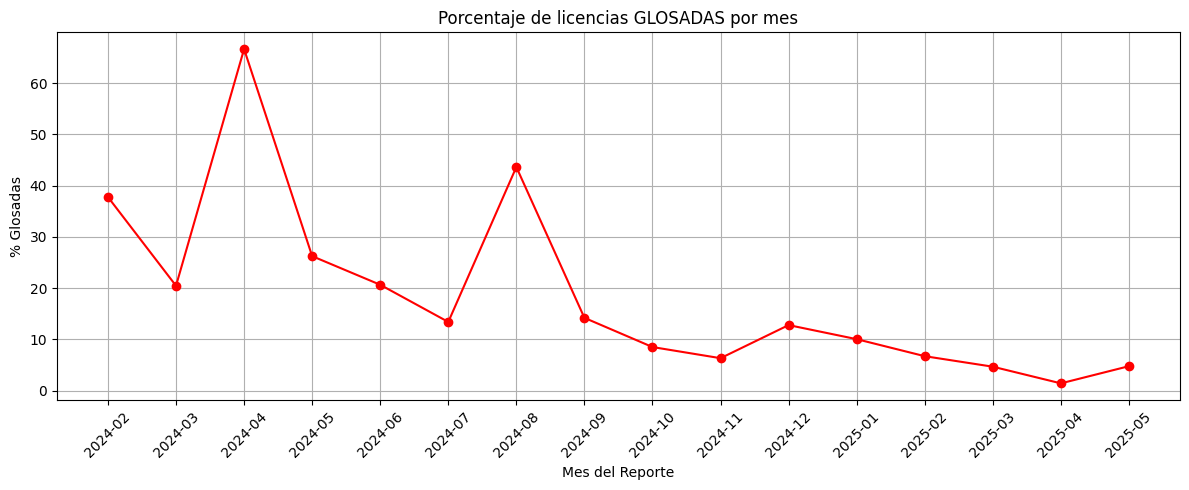

In [48]:
# Calcular la tasa de glosas mensual
tasa_glosas = conteo_estados.copy()
tasa_glosas['Total'] = tasa_glosas.sum(axis=1)
tasa_glosas['% Glosadas'] = (tasa_glosas['GLOSADA'] / tasa_glosas['Total']) * 100

# Gr치fico de l칤nea de la tasa de glosas
plt.figure(figsize=(12, 5))
plt.plot(tasa_glosas.index, tasa_glosas['% Glosadas'], marker='o', color='red')
plt.title('Porcentaje de licencias GLOSADAS por mes')
plt.xlabel('Mes del Reporte')
plt.ylabel('% Glosadas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 游늷 2. Top 10 documentos de aportante m치s glosados

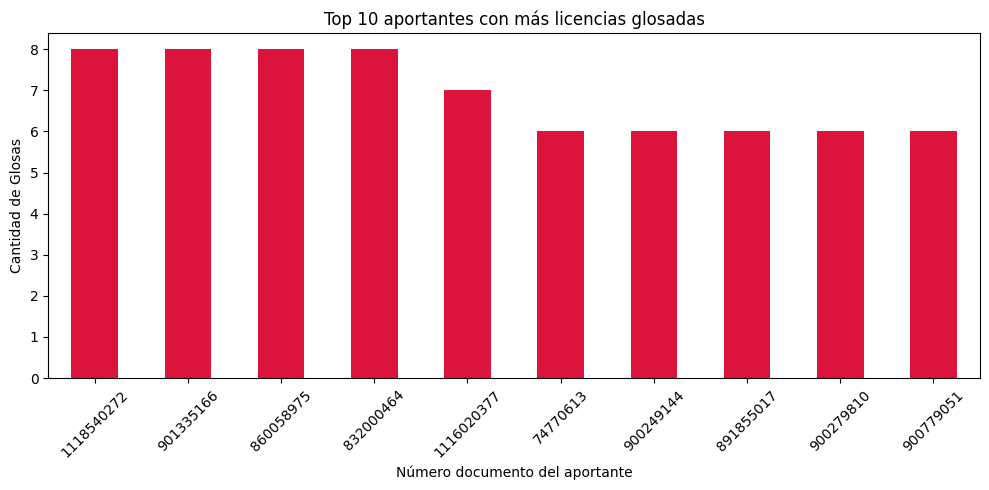

In [49]:
top_aportantes = df[df['ESTADO'] == 'GLOSADA'] \
    .groupby('N칰mero documento del aportante').size() \
    .sort_values(ascending=False).head(10)

top_aportantes.plot(kind='bar', color='crimson', figsize=(10, 5))
plt.title('Top 10 aportantes con m치s licencias glosadas')
plt.ylabel('Cantidad de Glosas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 游녻 3. Top 10 cotizantes con m치s glosas

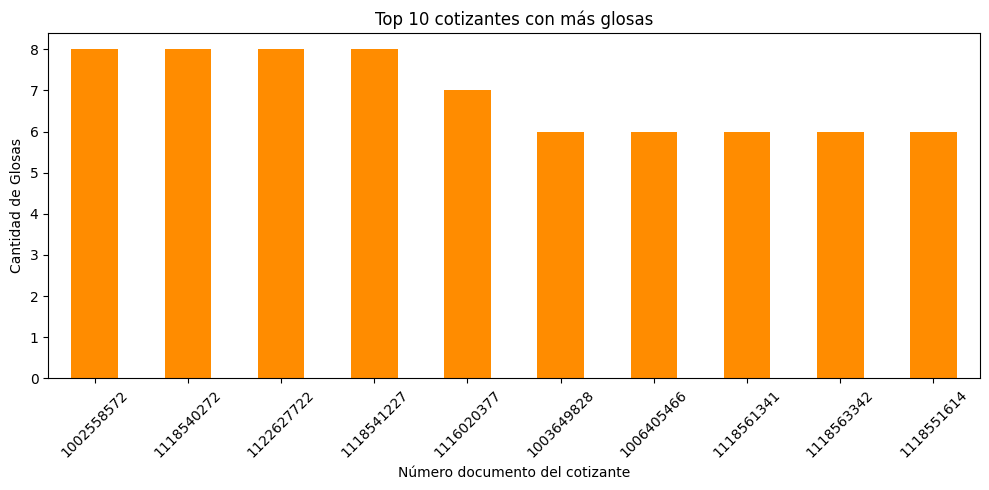

In [50]:
top_cotizantes = df[df['ESTADO'] == 'GLOSADA'] \
    .groupby('N칰mero documento del cotizante').size() \
    .sort_values(ascending=False).head(10)

top_cotizantes.plot(kind='bar', color='darkorange', figsize=(10, 5))
plt.title('Top 10 cotizantes con m치s glosas')
plt.ylabel('Cantidad de Glosas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 丘멆잺 4. Distribuci칩n de c칩digos de glosa

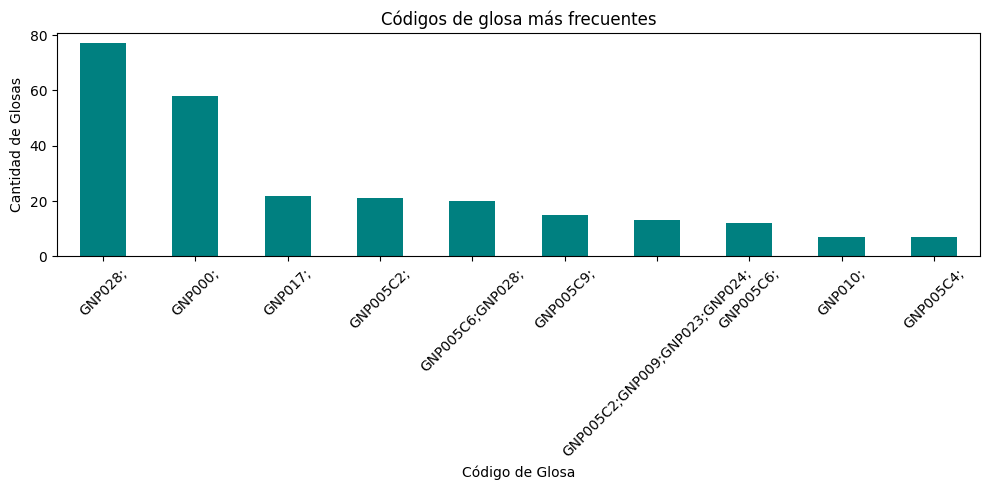

In [51]:
cod_glosa = df[df['ESTADO'] == 'GLOSADA']['C칩digo de glosas para registros con inconsistencia']
top_glosas = cod_glosa.value_counts().head(10)

top_glosas.plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('C칩digos de glosa m치s frecuentes')
plt.ylabel('Cantidad de Glosas')
plt.xlabel('C칩digo de Glosa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 游늱 5. Duraci칩n de las licencias glosadas vs validadas

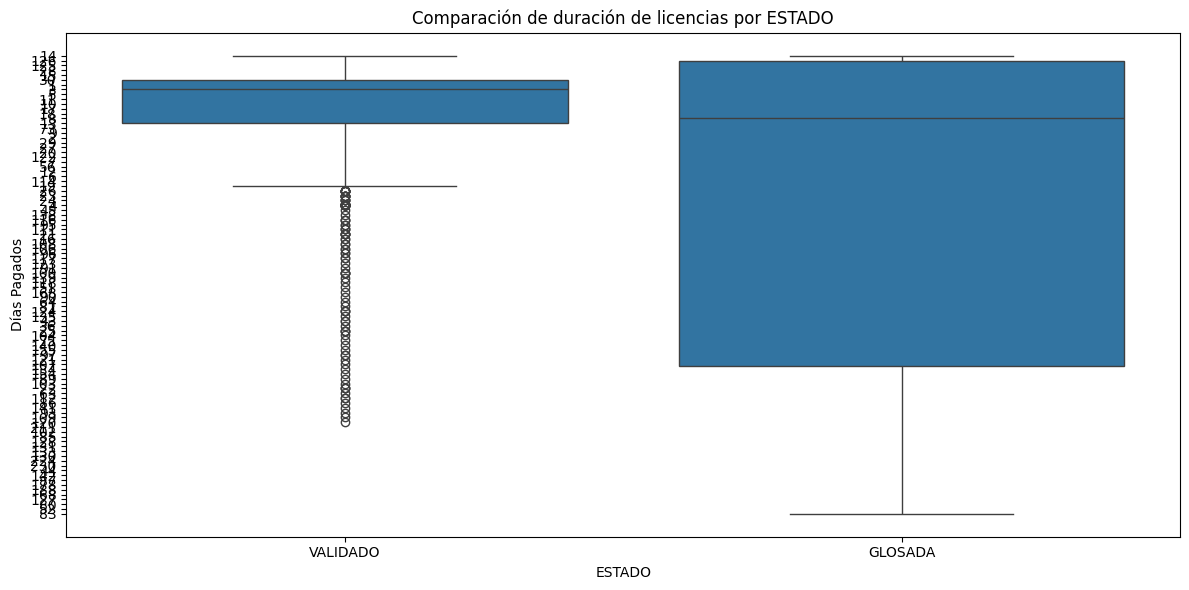

In [52]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['ESTADO'].isin(['GLOSADA', 'VALIDADO'])],
            x='ESTADO', y='D칤as pagados de licencia o incapacidad')
plt.title('Comparaci칩n de duraci칩n de licencias por ESTADO')
plt.ylabel('D칤as Pagados')
plt.tight_layout()
plt.show()